In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/EPICS/datasets/final-data.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Year,District,Recharge From Rain Fall During Monsoon Season in Ham,Recharge From Other Sources During Monsoon Season in Ham,Recharge From Rain Fall During Non Monsoon Season in Ham,Recharge From Other Sources During Non Monsoon Season in Ham,Total Annual Recharge in Ham,Natural Discharge During Non Monsoon Season In Ham,Net Ground Water Availability in Ham,Existing Gross Ground Water Draft for Irrigation in Ham,Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,Existing Gross Ground Water Draft for All Uses in Ham,Allocation For Domestic & Industrial Water Supply in Ham,Net Ground Water Availability for Future Irrigation Development in Ham,Stage of Ground Water Development in %,Unnamed: 15
0,2013,AGAR,36674.73,2061.45,0.00,8251.14,46987.32,2349.37,44637.95,37308.18,1272.29,38580.47,1790.1,5539.67,86.43,NaN
1,2013,ALIRAJPUR,19191.82,823.10,0.00,1448.74,21463.66,1073.18,20390.48,4750.28,2213.72,6964.00,5824.0,9816.20,34.15,NaN
2,2013,ANUPUR,33590.79,95.36,5577.68,233.85,39497.68,1974.89,37522.79,1122.34,1209.16,2331.50,2700.4,33700.05,6.21,NaN
3,2013,ASHOKNAGAR,36014.15,1787.64,0.00,6046.90,43848.69,2192.51,41656.18,19542.35,1602.50,21144.85,2584.0,19529.83,50.76,NaN
4,2013,BADWANI,36922.22,1608.16,0.00,5775.65,44306.03,2215.30,42090.73,31115.06,3242.63,34357.69,4714.6,6261.07,81.63,NaN


In [ ]:
# checking fro null values
data.isnull().sum()

,0
Year,0
District,0
Recharge From Rain Fall During Monsoon Season in Ham,0
Recharge From Other Sources During Monsoon Season in Ham,0
Recharge From Rain Fall During Non Monsoon Season in Ham,0
Recharge From Other Sources During Non Monsoon Season in Ham,0
Total Annual Recharge in Ham,0
Natural Discharge During Non Monsoon Season In Ham,0
Net Ground Water Availability in Ham,0
Existing Gross Ground Water Draft for Irrigation in Ham,0


In [ ]:
pip install --upgrade pymannkendall

In [ ]:
# droping unmaned: 15 column
data.drop('Unnamed: 15', axis=1, inplace=True)

In [ ]:
data.head()

,Year,District,Recharge From Rain Fall During Monsoon Season in Ham,Recharge From Other Sources During Monsoon Season in Ham,Recharge From Rain Fall During Non Monsoon Season in Ham,Recharge From Other Sources During Non Monsoon Season in Ham,Total Annual Recharge in Ham,Natural Discharge During Non Monsoon Season In Ham,Net Ground Water Availability in Ham,Existing Gross Ground Water Draft for Irrigation in Ham,Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,Existing Gross Ground Water Draft for All Uses in Ham,Allocation For Domestic & Industrial Water Supply in Ham,Net Ground Water Availability for Future Irrigation Development in Ham,Stage of Ground Water Development in %
0,2013,AGAR,36674.73,2061.45,0.00,8251.14,46987.32,2349.37,44637.95,37308.18,1272.29,38580.47,1790.1,5539.67,86.43
1,2013,ALIRAJPUR,19191.82,823.10,0.00,1448.74,21463.66,1073.18,20390.48,4750.28,2213.72,6964.00,5824.0,9816.20,34.15
2,2013,ANUPUR,33590.79,95.36,5577.68,233.85,39497.68,1974.89,37522.79,1122.34,1209.16,2331.50,2700.4,33700.05,6.21
3,2013,ASHOKNAGAR,36014.15,1787.64,0.00,6046.90,43848.69,2192.51,41656.18,19542.35,1602.50,21144.85,2584.0,19529.83,50.76
4,2013,BADWANI,36922.22,1608.16,0.00,5775.65,44306.03,2215.30,42090.73,31115.06,3242.63,34357.69,4714.6,6261.07,81.63


In [ ]:
# standardizing numeric data dfrom column 3 to last
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#checking that data only contains numeric value than perfoming standardization
numeric_columns = data.columns[2:]
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head()

,Year,District,Recharge From Rain Fall During Monsoon Season in Ham,Recharge From Other Sources During Monsoon Season in Ham,Recharge From Rain Fall During Non Monsoon Season in Ham,Recharge From Other Sources During Non Monsoon Season in Ham,Total Annual Recharge in Ham,Natural Discharge During Non Monsoon Season In Ham,Net Ground Water Availability in Ham,Existing Gross Ground Water Draft for Irrigation in Ham,Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,Existing Gross Ground Water Draft for All Uses in Ham,Allocation For Domestic & Industrial Water Supply in Ham,Net Ground Water Availability for Future Irrigation Development in Ham,Stage of Ground Water Development in %
0,2013,AGAR,-0.717029,-0.397071,-0.423722,-0.364033,-0.699812,-0.903384,-0.678363,0.117446,-0.295343,0.573086,-0.704773,-0.552143,-0.576015
1,2013,ALIRAJPUR,-1.436776,-1.003608,-0.423722,-0.986386,-1.467540,-1.489843,-1.450599,-1.235660,0.325360,-0.657154,-0.523343,-0.368188,-0.578643
2,2013,ANUPUR,-0.843990,-1.360050,1.800791,-1.097537,-0.925093,-1.075472,-0.904967,-1.386438,-0.336966,-0.837411,-0.663831,0.659175,-0.580048
3,2013,ASHOKNAGAR,-0.744224,-0.531182,-0.423722,-0.565699,-0.794219,-0.975467,-0.773327,-0.620902,-0.077629,-0.105358,-0.669066,0.049644,-0.577808
4,2013,BADWANI,-0.706840,-0.619090,-0.423722,-0.590516,-0.780463,-0.964995,-0.759487,-0.139940,1.003741,0.408772,-0.573240,-0.521112,-0.576256


In [ ]:
data.describe()

,Year,Recharge From Rain Fall During Monsoon Season in Ham,Recharge From Other Sources During Monsoon Season in Ham,Recharge From Rain Fall During Non Monsoon Season in Ham,Recharge From Other Sources During Non Monsoon Season in Ham,Total Annual Recharge in Ham,Natural Discharge During Non Monsoon Season In Ham,Net Ground Water Availability in Ham,Existing Gross Ground Water Draft for Irrigation in Ham,Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,Existing Gross Ground Water Draft for All Uses in Ham,Allocation For Domestic & Industrial Water Supply in Ham,Net Ground Water Availability for Future Irrigation Development in Ham,Stage of Ground Water Development in %
count,256.000000,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,256.000000,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02
mean,2017.417969,2.151057e-16,-4.857226e-17,-8.326673e-17,1.318390e-16,-2.012279e-16,2.498002e-16,-2.949030e-16,2.151057e-16,0.000000,5.551115e-17,5.551115e-17,5.551115e-17,5.551115e-17
std,3.274547,1.001959e+00,1.001959e+00,1.001959e+00,1.001959e+00,1.001959e+00,1.001959e+00,1.001959e+00,1.001959e+00,1.001959,1.001959e+00,1.001959e+00,1.001959e+00,1.001959e+00
min,2013.000000,-1.632402e+00,-1.360050e+00,-4.237219e-01,-1.097537e+00,-1.526148e+00,-1.529381e+00,-1.526699e+00,-1.386438e+00,-1.134189,-8.853612e-01,-7.313588e-01,-1.727082e+00,-5.800485e-01
25%,2015.000000,-8.360094e-01,-8.401390e-01,-4.237219e-01,-6.043705e-01,-8.036987e-01,-7.271662e-01,-7.944959e-01,-8.457707e-01,-1.111421,-7.950052e-01,-6.255743e-01,-6.422412e-01,-5.779029e-01
50%,2017.000000,-2.115181e-01,-8.912551e-02,-4.237219e-01,-1.047549e-01,-1.674091e-01,-1.321339e-01,-1.902426e-01,-1.095723e-01,-0.049753,-4.560368e-01,-5.186139e-01,-4.083657e-01,-5.761609e-01
75%,2020.000000,5.601291e-01,5.017767e-01,-2.502574e-01,2.981724e-01,5.345687e-01,5.342325e-01,5.184964e-01,6.013948e-01,0.808013,6.814970e-01,3.063844e-01,5.368780e-01,4.454715e-01
max,2022.000000,3.885506e+00,4.201042e+00,5.775337e+00,4.973474e+00,4.482777e+00,4.664012e+00,4.534672e+00,2.869196e+00,3.215079,3.057294e+00,4.060556e+00,6.295441e+00,7.139401e+00


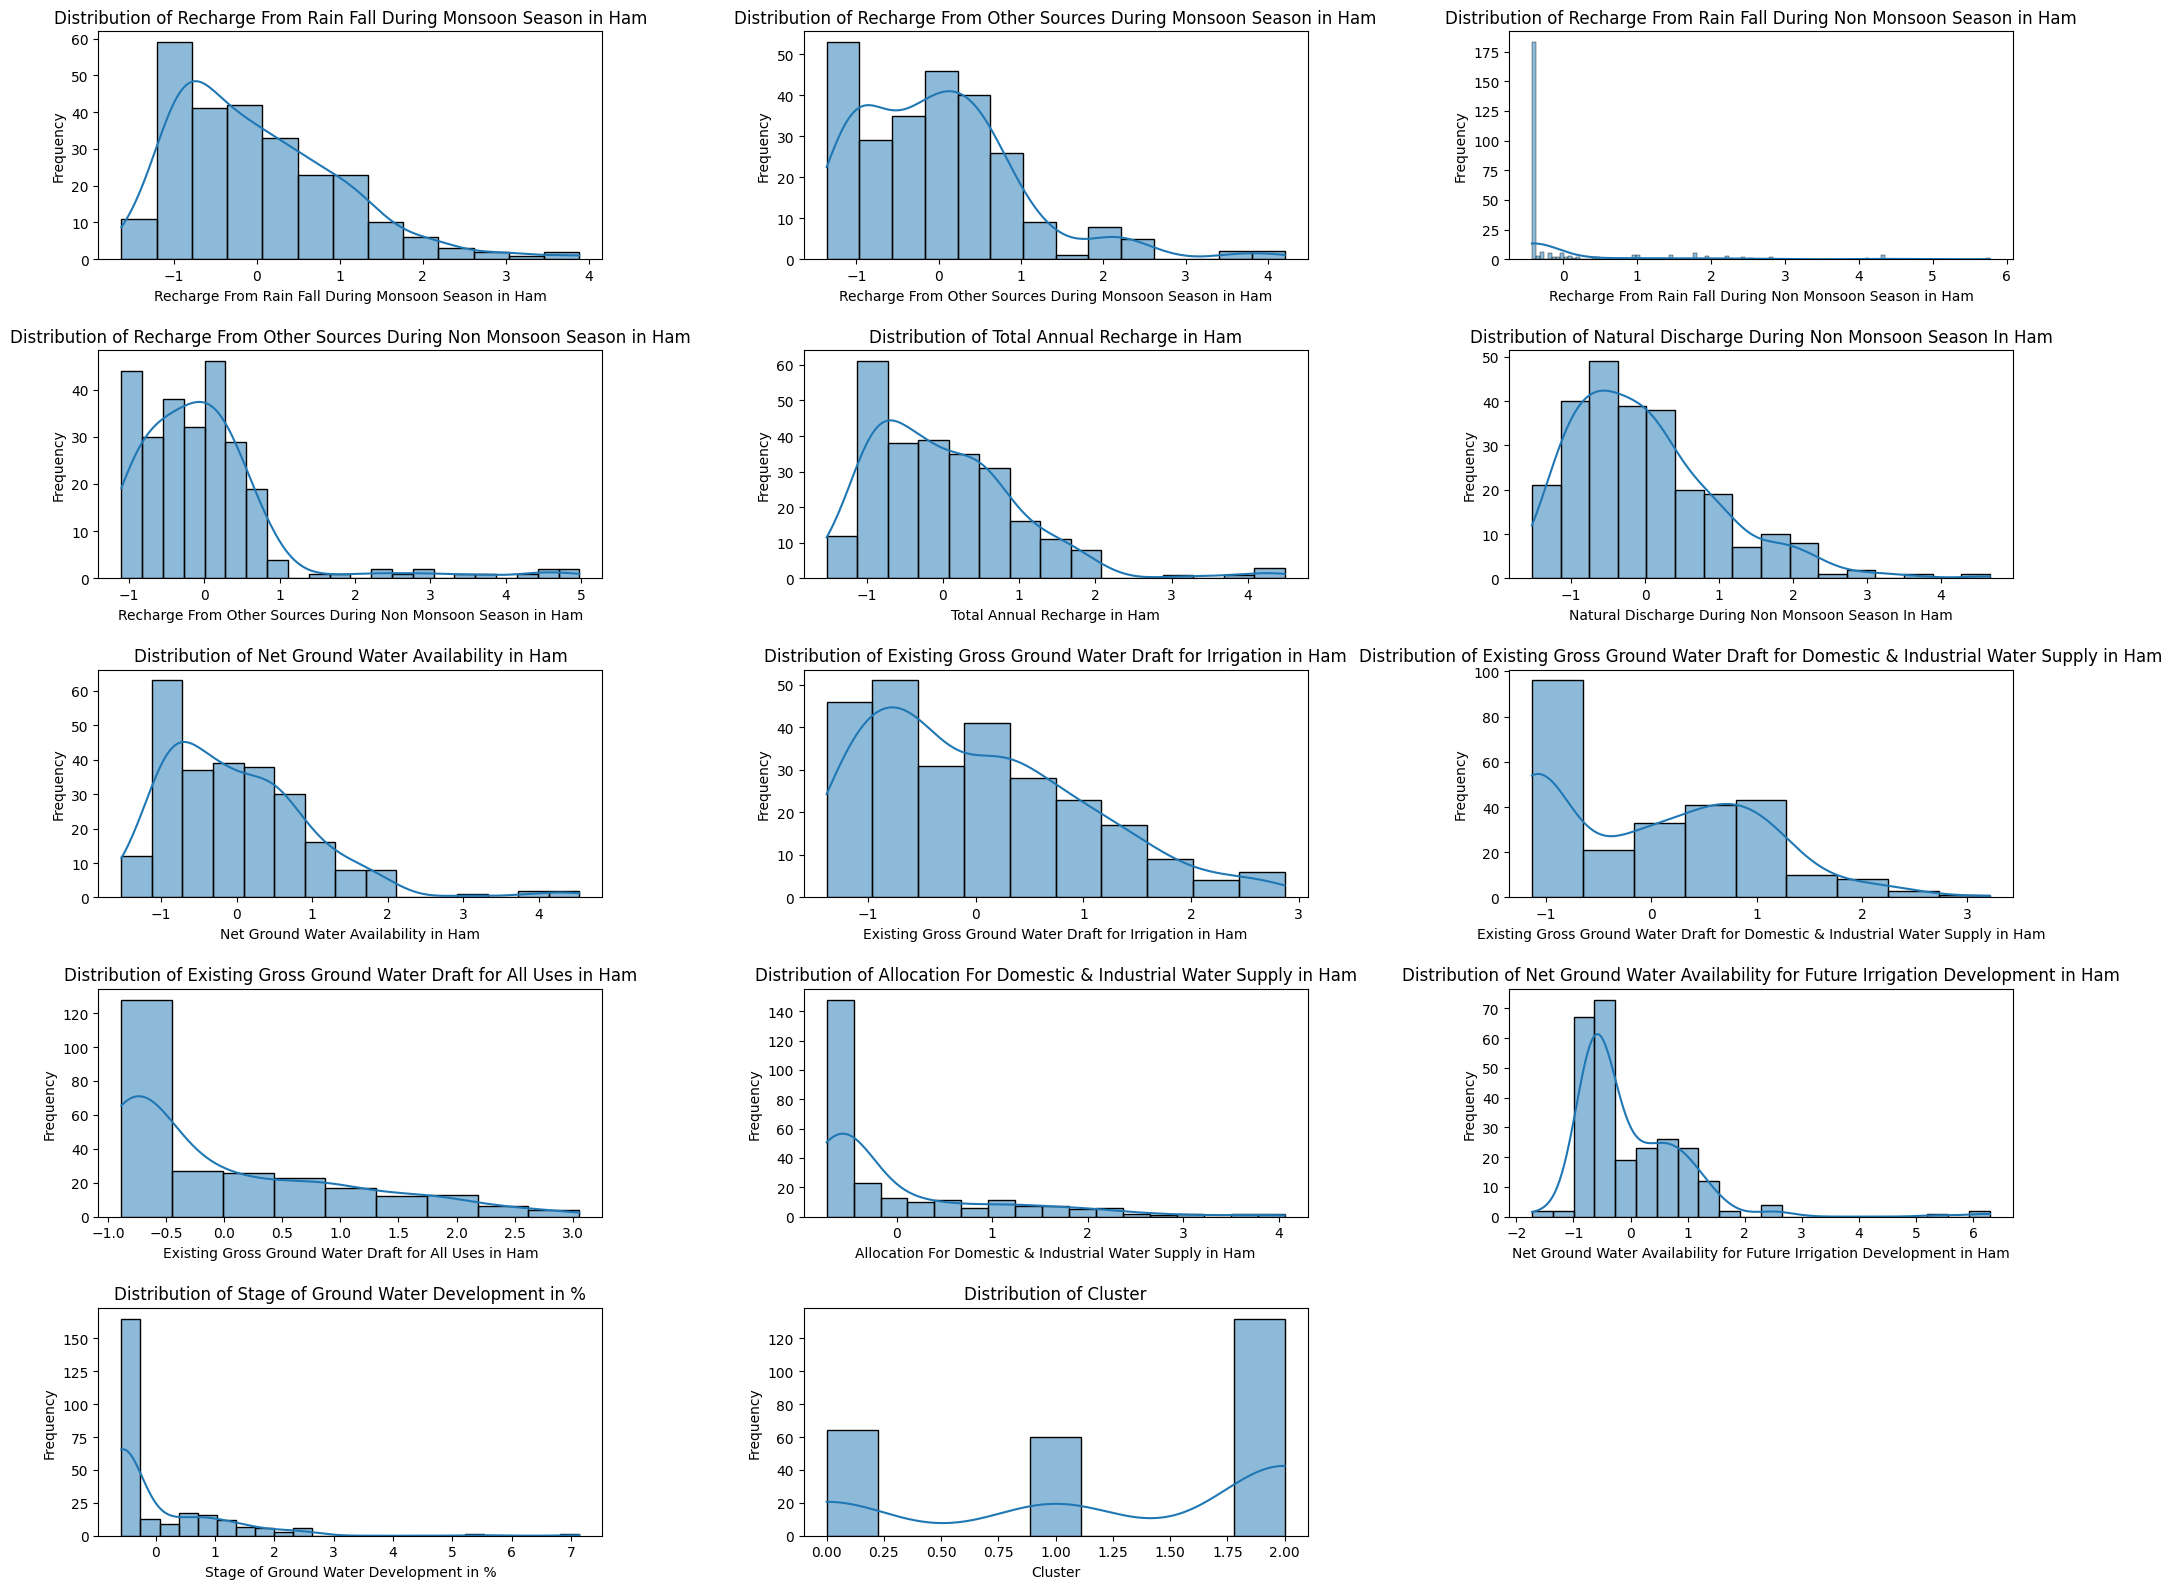

In [ ]:
# Data visualization
plt.figure(figsize=(20, 16))  # Adjust overall size
num_cols = 3
num_rows = (len(data.columns[2:]) + num_cols - 1) // num_cols

for i, column in enumerate(data.columns[2:]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # <-- Add horizontal and vertical spacing
plt.savefig('variable_distributions.png')
plt.show()


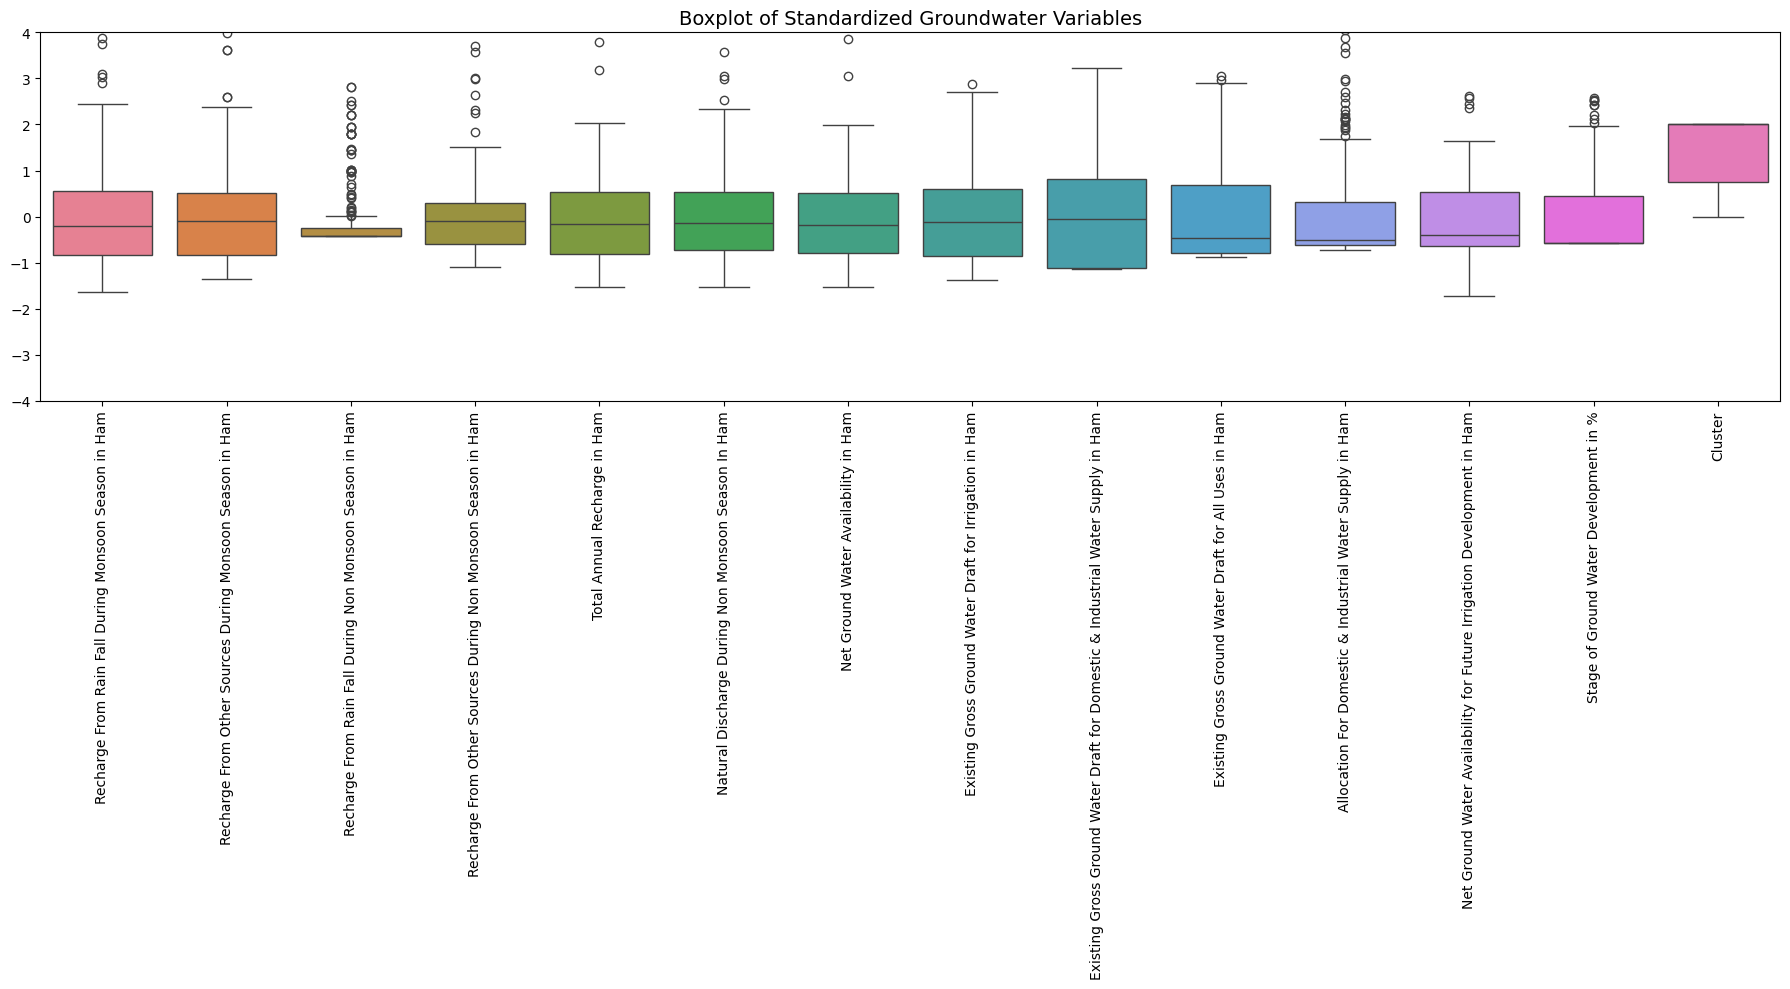

In [ ]:
# Data visualization - Boxplots
# Boxplots to identify outliers in standardized data

plt.figure(figsize=(18, 10))  # Wider and taller plot
ax = sns.boxplot(data=data[data.columns[2:]])
plt.title('Boxplot of Standardized Groundwater Variables', fontsize=14)
plt.xticks(rotation=90)

# Optional: Adjust Y-axis scale if all data is standardized (e.g., mean ~0, std ~1)
ax.set_ylim(-4, 4)  # You can adjust these values based on your data

plt.tight_layout()
plt.savefig('standardized_boxplot.png')
plt.show()


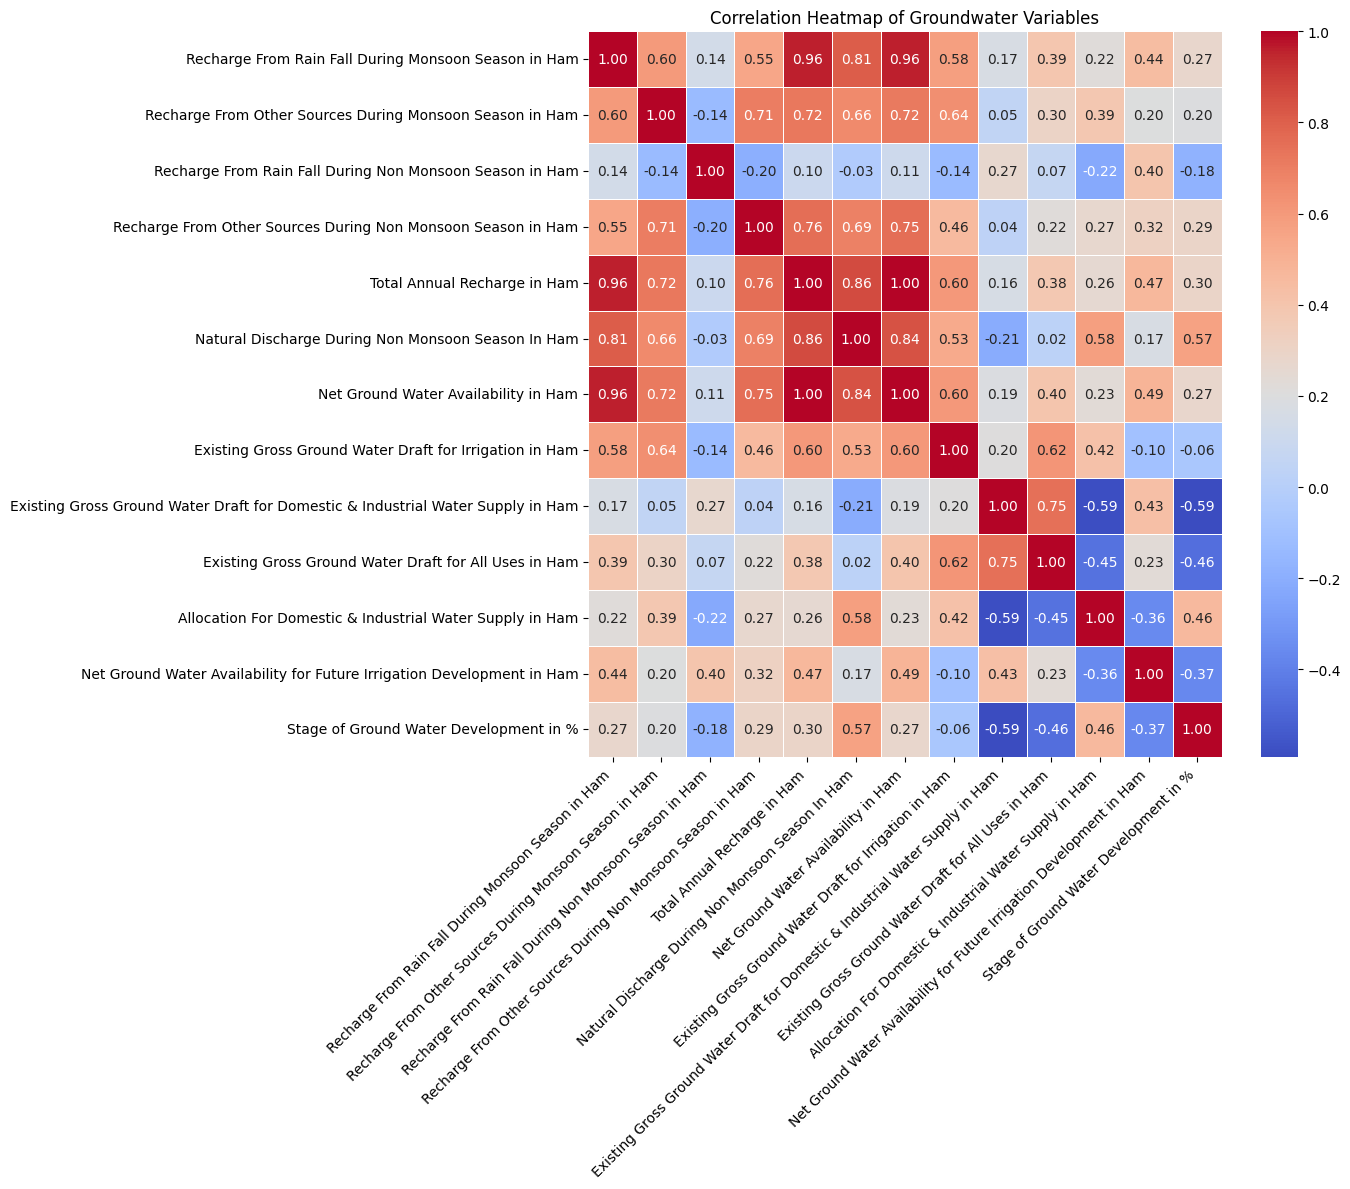

In [ ]:
# Correlation Analysis
# Compute correlation matrix
correlation_matrix = data[data.columns[2:]].corr()

# Visualize correlations using heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Groundwater Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

Key variables selected for analysis:
['Recharge From Rain Fall During Monsoon Season in Ham', 'Recharge From Other Sources During Monsoon Season in Ham', 'Recharge From Rain Fall During Non Monsoon Season in Ham', 'Recharge From Other Sources During Non Monsoon Season in Ham', 'Total Annual Recharge in Ham']


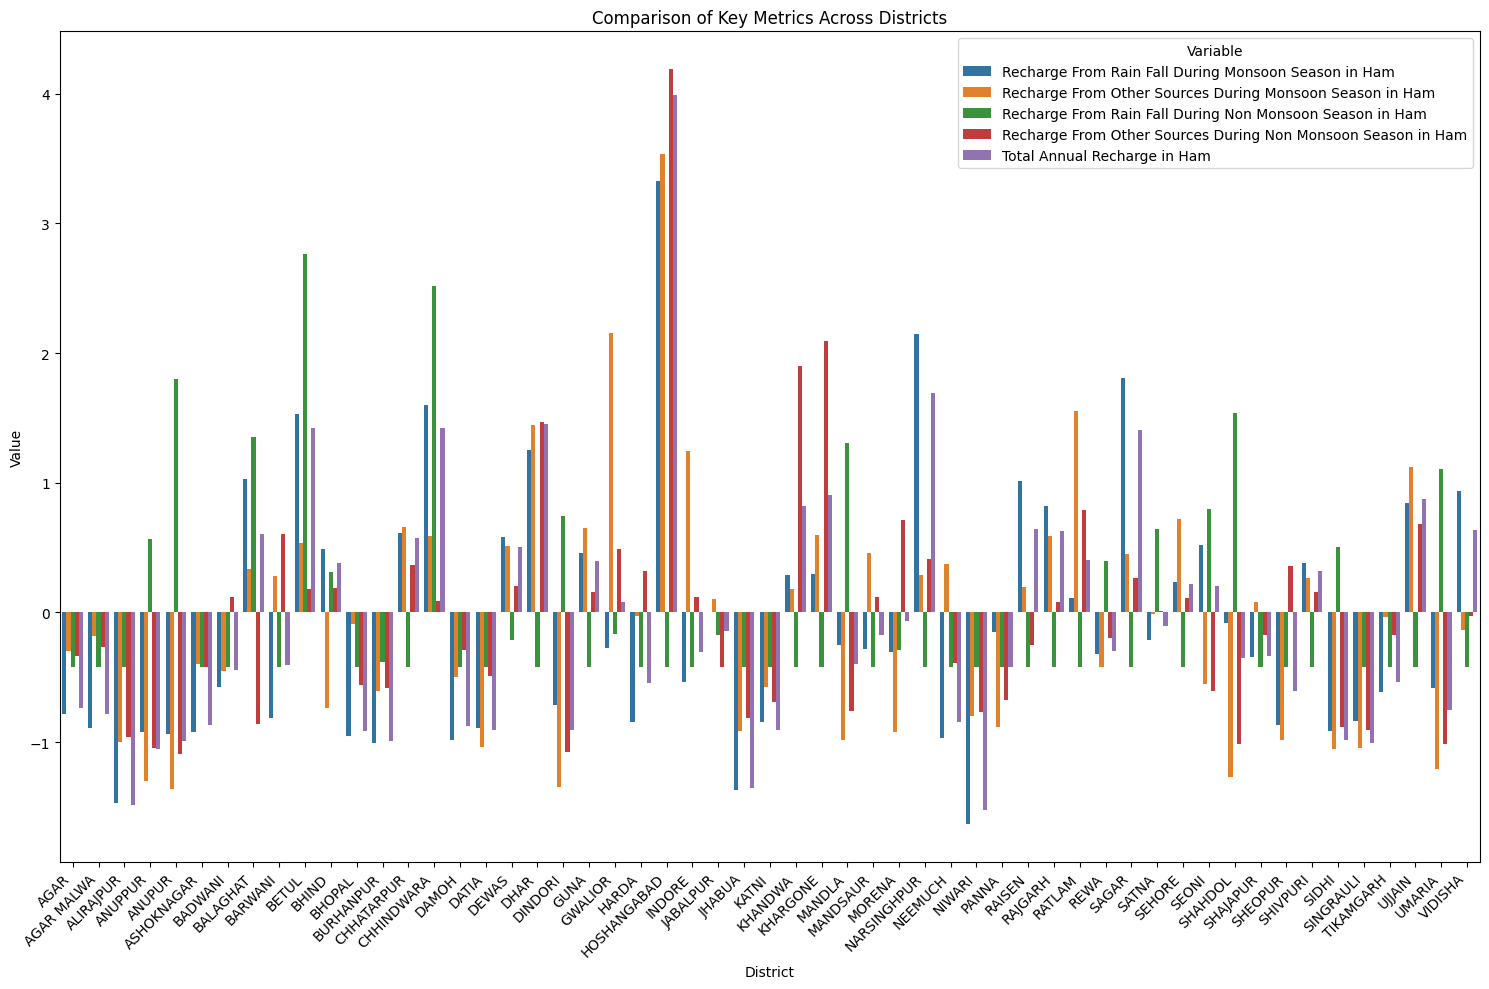

In [ ]:
# District Analysis
# Define key variables for analysis
key_variables = data.columns[2:7]  # Adjust as needed
print("Key variables selected for analysis:")
print(key_variables.tolist())

# Bar chart comparing districts for key variables
plt.figure(figsize=(15, 10))
district_column = data.columns[1]  # The district column
district_data = data.groupby(district_column)[key_variables].mean().reset_index()
district_data_melted = pd.melt(district_data, id_vars=[district_column],
                              value_vars=key_variables,
                              var_name='Variable', value_name='Value')
sns.barplot(x=district_column, y='Value', hue='Variable', data=district_data_melted)
plt.title('Comparison of Key Metrics Across Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('district_comparison.png')
plt.show()

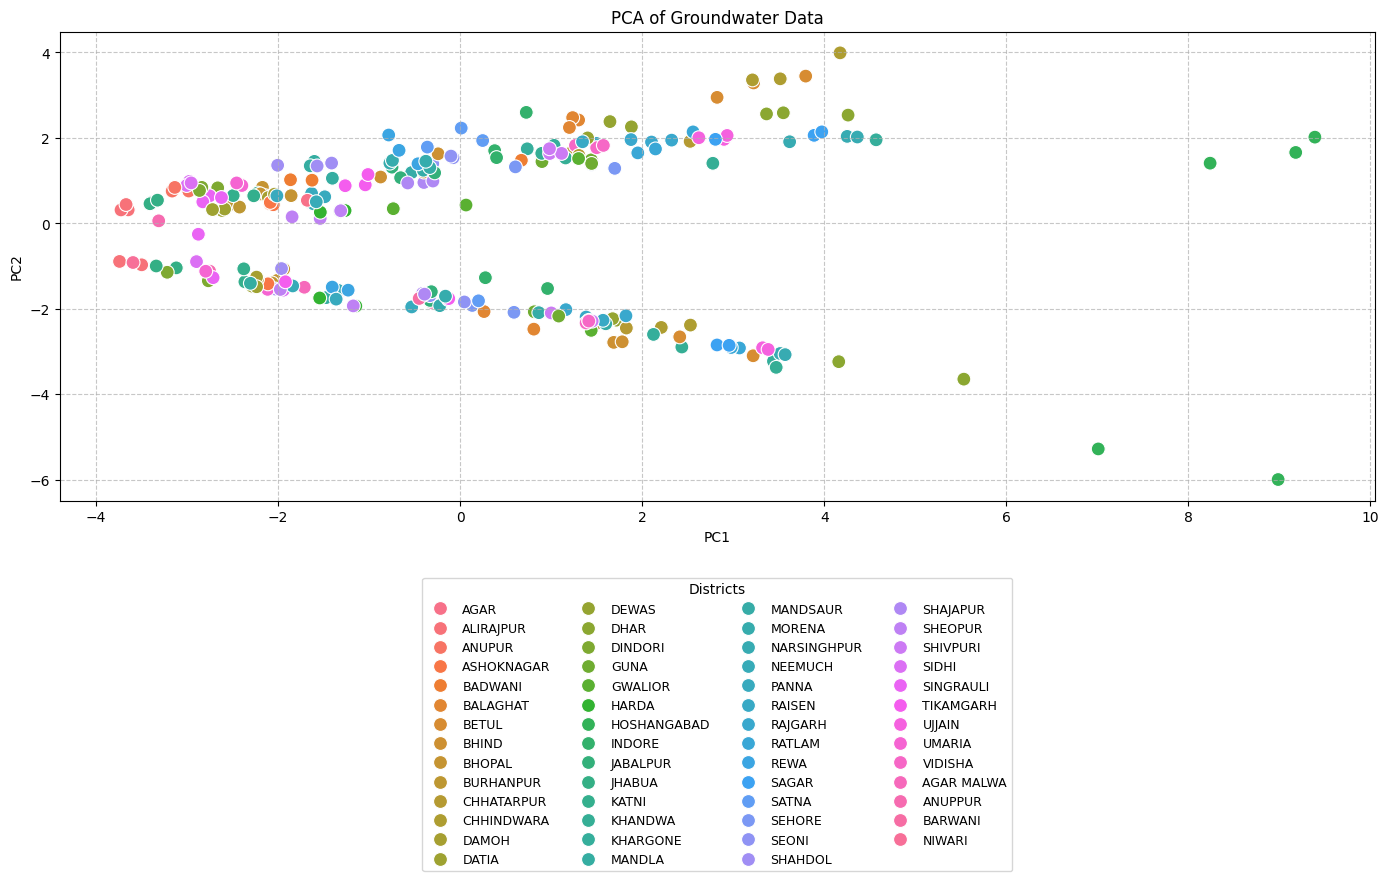


Explanation of variance by principal components:
PC1 explains 43.95% of variance
PC2 explains 23.71% of variance
Total explained variance: 67.66%

Feature contributions to principal components:


,PC1,PC2
Recharge From Rain Fall During Monsoon Season in Ham,0.372082,0.039801
Recharge From Other Sources During Monsoon Season in Ham,0.330035,-0.056642
Recharge From Rain Fall During Non Monsoon Season in Ham,0.004451,0.220409
Recharge From Other Sources During Non Monsoon Season in Ham,0.318428,-0.071900
Total Annual Recharge in Ham,0.397219,0.018592
Natural Discharge During Non Monsoon Season In Ham,0.354036,-0.215267
Net Ground Water Availability in Ham,0.396046,0.034606
Existing Gross Ground Water Draft for Irrigation in Ham,0.298452,0.045080
Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,0.063093,0.493497
Existing Gross Ground Water Draft for All Uses in Ham,0.173943,0.417045


from matplotlib import pyplot as plt
loadings['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
loadings['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
loadings.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
loadings['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
loadings['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# PCA setup
X = data[data.columns[2:]]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Prepare DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df[district_column] = data[district_column].values

# Plot
plt.figure(figsize=(14, 12))
scatter = sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=district_column, s=100)

# Title and grid
plt.title('PCA of Groundwater Data')
plt.grid(True, linestyle='--', alpha=0.7)

# Move legend below the plot in 4 columns
plt.legend(
    title='Districts',
    bbox_to_anchor=(0.5, -0.15),  # Below plot
    loc='upper center',
    ncol=4,  # 4 columns
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout(rect=[0, 0.15, 1, 0.95])  # Leave space for legend
plt.savefig('pca_plot.png')
plt.show()

# Explained variance
print("\nExplanation of variance by principal components:")
print(f"PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
print("\nFeature contributions to principal components:")
loadings


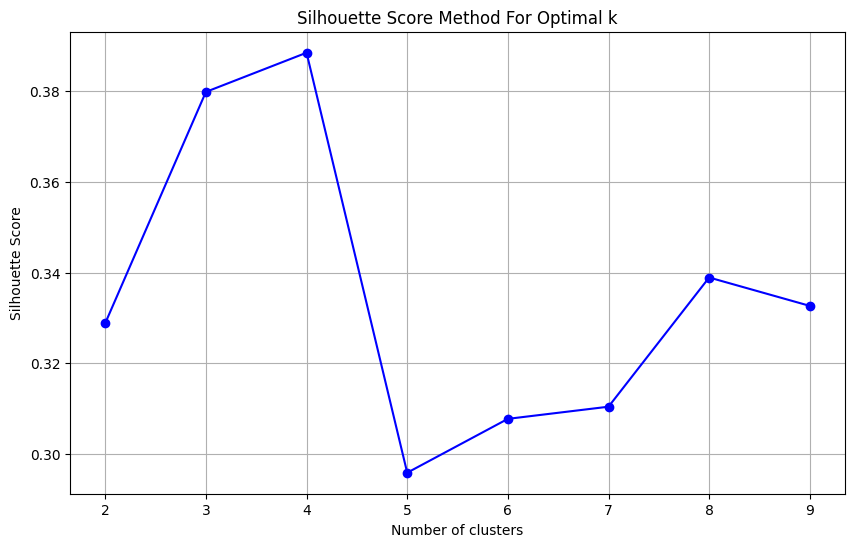


Optimal number of clusters: 4


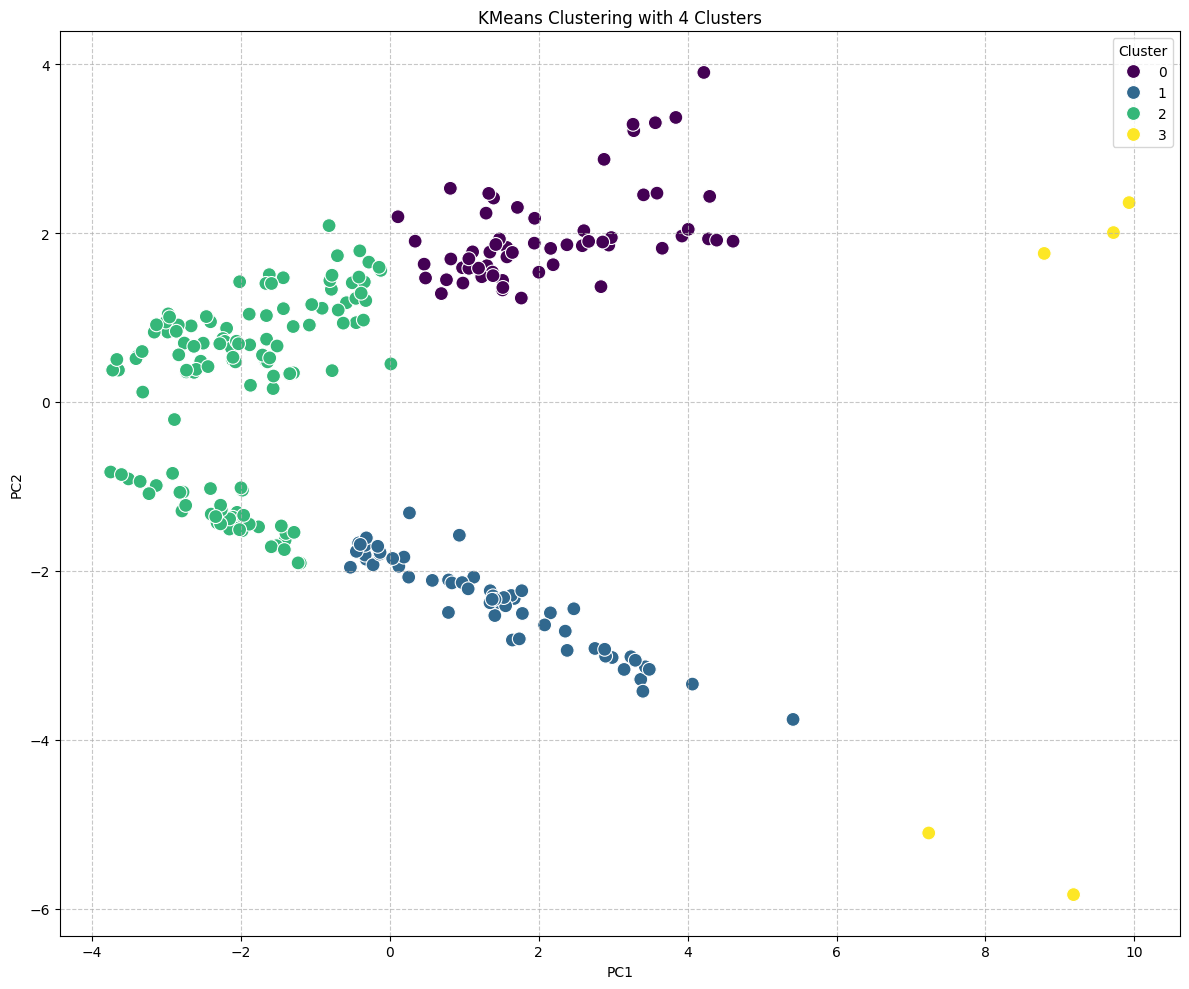


Cluster Centers:


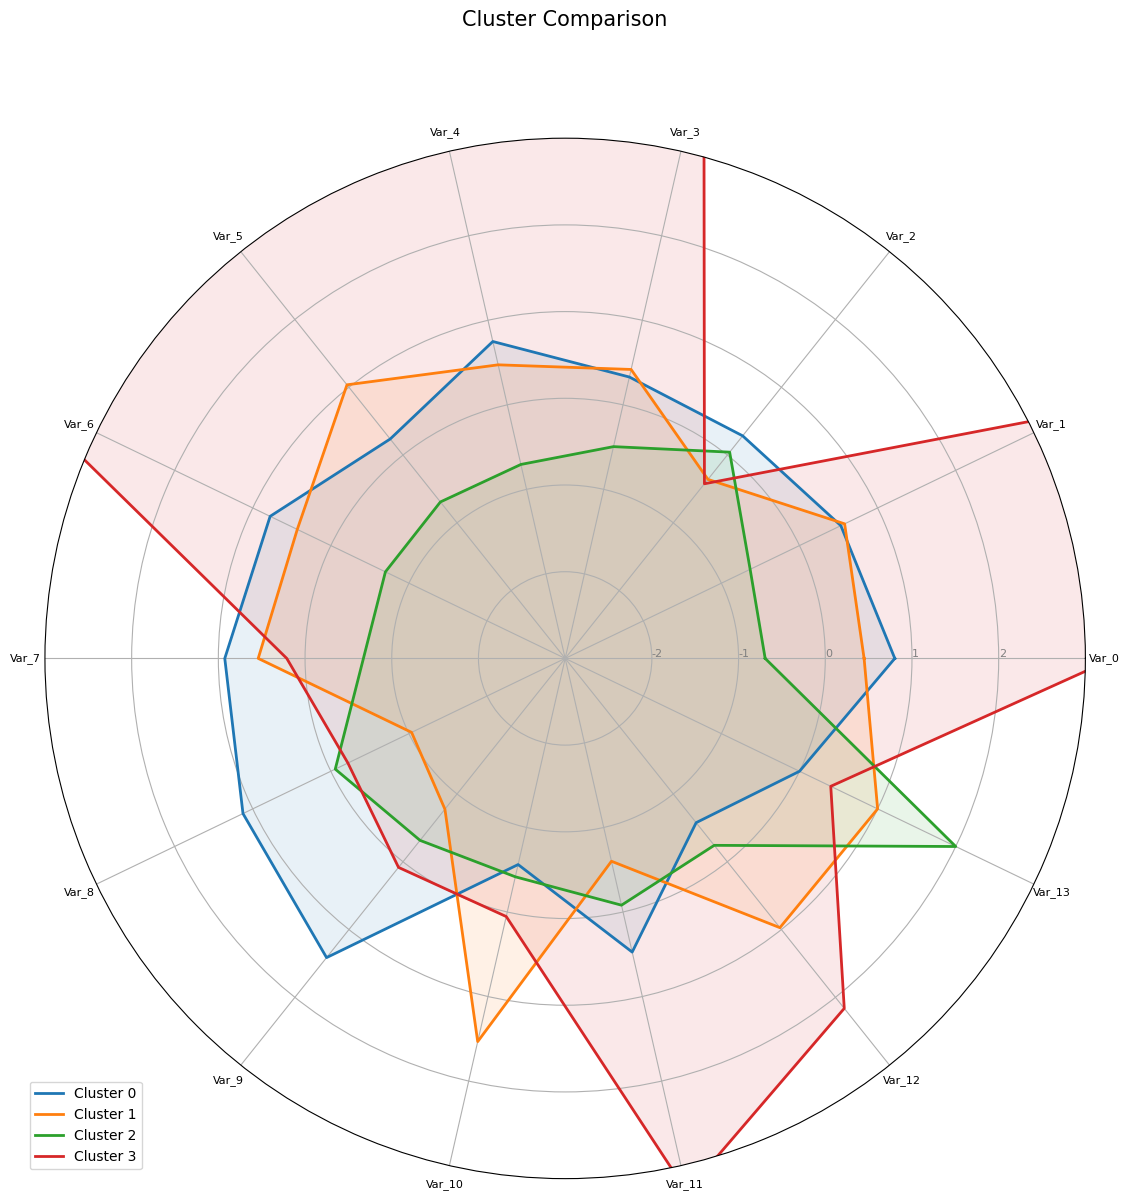


Variable name mapping for radar chart:
Var_0: Recharge From Rain Fall During Monsoon Season in Ham
Var_1: Recharge From Other Sources During Monsoon Season in Ham
Var_2: Recharge From Rain Fall During Non Monsoon Season in Ham
Var_3: Recharge From Other Sources During Non Monsoon Season in Ham
Var_4: Total Annual Recharge in Ham
Var_5: Natural Discharge During Non Monsoon Season In Ham
Var_6: Net Ground Water Availability in Ham
Var_7: Existing Gross Ground Water Draft for Irrigation in Ham
Var_8: Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham
Var_9: Existing Gross Ground Water Draft for All Uses in Ham
Var_10: Allocation For Domestic & Industrial Water Supply in Ham
Var_11: Net Ground Water Availability for Future Irrigation Development in Ham
Var_12: Stage of Ground Water Development in %
Var_13: Cluster

Summary statistics by cluster:


In [ ]:
# Cluster Analysis
# Determine optimal number of clusters using silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, min(10, len(data)-1))  # Ensure K is less than number of samples
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    try:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    except:
        silhouette_scores.append(-1)  # In case of failure

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method For Optimal k')
plt.grid(True)
plt.savefig('optimal_clusters.png')
plt.show()

# Apply K-means with optimal number of clusters (if possible)
if max(silhouette_scores) > 0:
    optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
    print(f"\nOptimal number of clusters: {optimal_k}")

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)

    # Add cluster information to pca_df
    pca_df['Cluster'] = data['Cluster'].values

    # Visualize clusters
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', palette='viridis', s=100)
    plt.title(f'KMeans Clustering with {optimal_k} Clusters')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('kmeans_clusters.png')
    plt.show()

    # Fix the dataframe columns issue for cluster centers
    # Get the exact number of columns in X
    X_cols = X.columns.tolist()

    # Create DataFrame with correct number of columns
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_cols)
    print("\nCluster Centers:")
    cluster_centers

    # Radar chart for comparing clusters
    from math import pi

    def radar_chart(centers, categories, title):
        # Number of variables
        N = len(categories)

        # Create angles for each variable
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]  # Close the loop

        # Create figure
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

        # Draw one axis per variable and add labels
        plt.xticks(angles[:-1], categories, size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([-2, -1, 0, 1, 2], ["-2", "-1", "0", "1", "2"], color="grey", size=8)
        plt.ylim(-3, 3)

        # Plot each cluster
        for i in range(len(centers)):
            values = centers.iloc[i].values.tolist()
            values += values[:1]  # Close the loop

            # Plot values
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
            ax.fill(angles, values, alpha=0.1)

        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title(title, size=15, y=1.1)
        plt.tight_layout()
        plt.savefig('cluster_radar_chart.png')
        plt.show()

    # Use shorter variable names for readability in radar chart
    short_names = [f"Var_{i}" for i in range(len(X_cols))]
    radar_chart(cluster_centers, short_names, 'Cluster Comparison')

    # Print mapping of short names to actual column names
    print("\nVariable name mapping for radar chart:")
    for i, col in enumerate(X_cols):
        print(f"Var_{i}: {col}")

    # Summary statistics by cluster
    print("\nSummary statistics by cluster:")
    cluster_stats = data.groupby('Cluster')[X_cols].mean()
    cluster_stats
else:
    print("Could not determine optimal number of clusters. Silhouette scores were negative.")


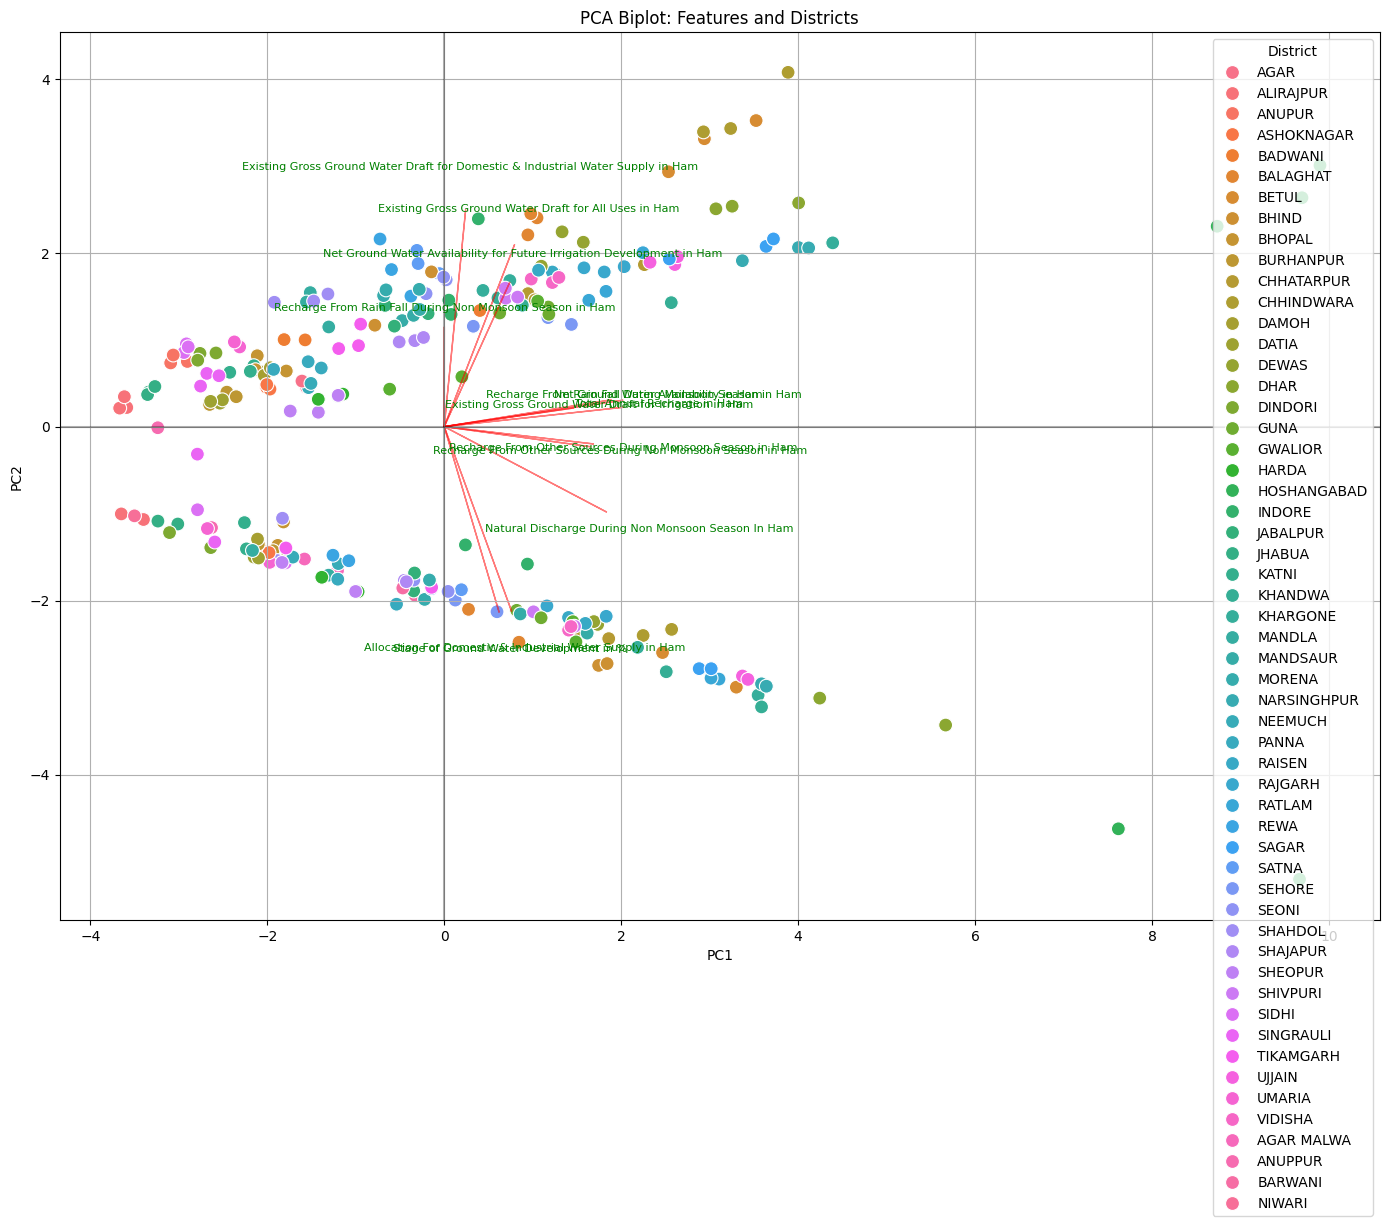

In [ ]:
# Biplot (PCA with Feature Vectors)
# Create a biplot
plt.figure(figsize=(14, 12))
# Plot the principal components
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=district_column, s=100)

# Create a scaling factor for the vectors
scaling_factor = 5

# Plot the feature vectors (limit to important features if there are too many)
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0,
            loadings.iloc[i, 0] * scaling_factor,
            loadings.iloc[i, 1] * scaling_factor,
            color='r', alpha=0.5)
    plt.text(loadings.iloc[i, 0] * scaling_factor * 1.2,
            loadings.iloc[i, 1] * scaling_factor * 1.2,
            feature, color='g', ha='center', va='center', fontsize=8)

plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('PCA Biplot: Features and Districts')
plt.tight_layout()
plt.savefig('pca_biplot.png')
plt.show()

<ipython-input-60-e6eb10ec7e29>:13: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


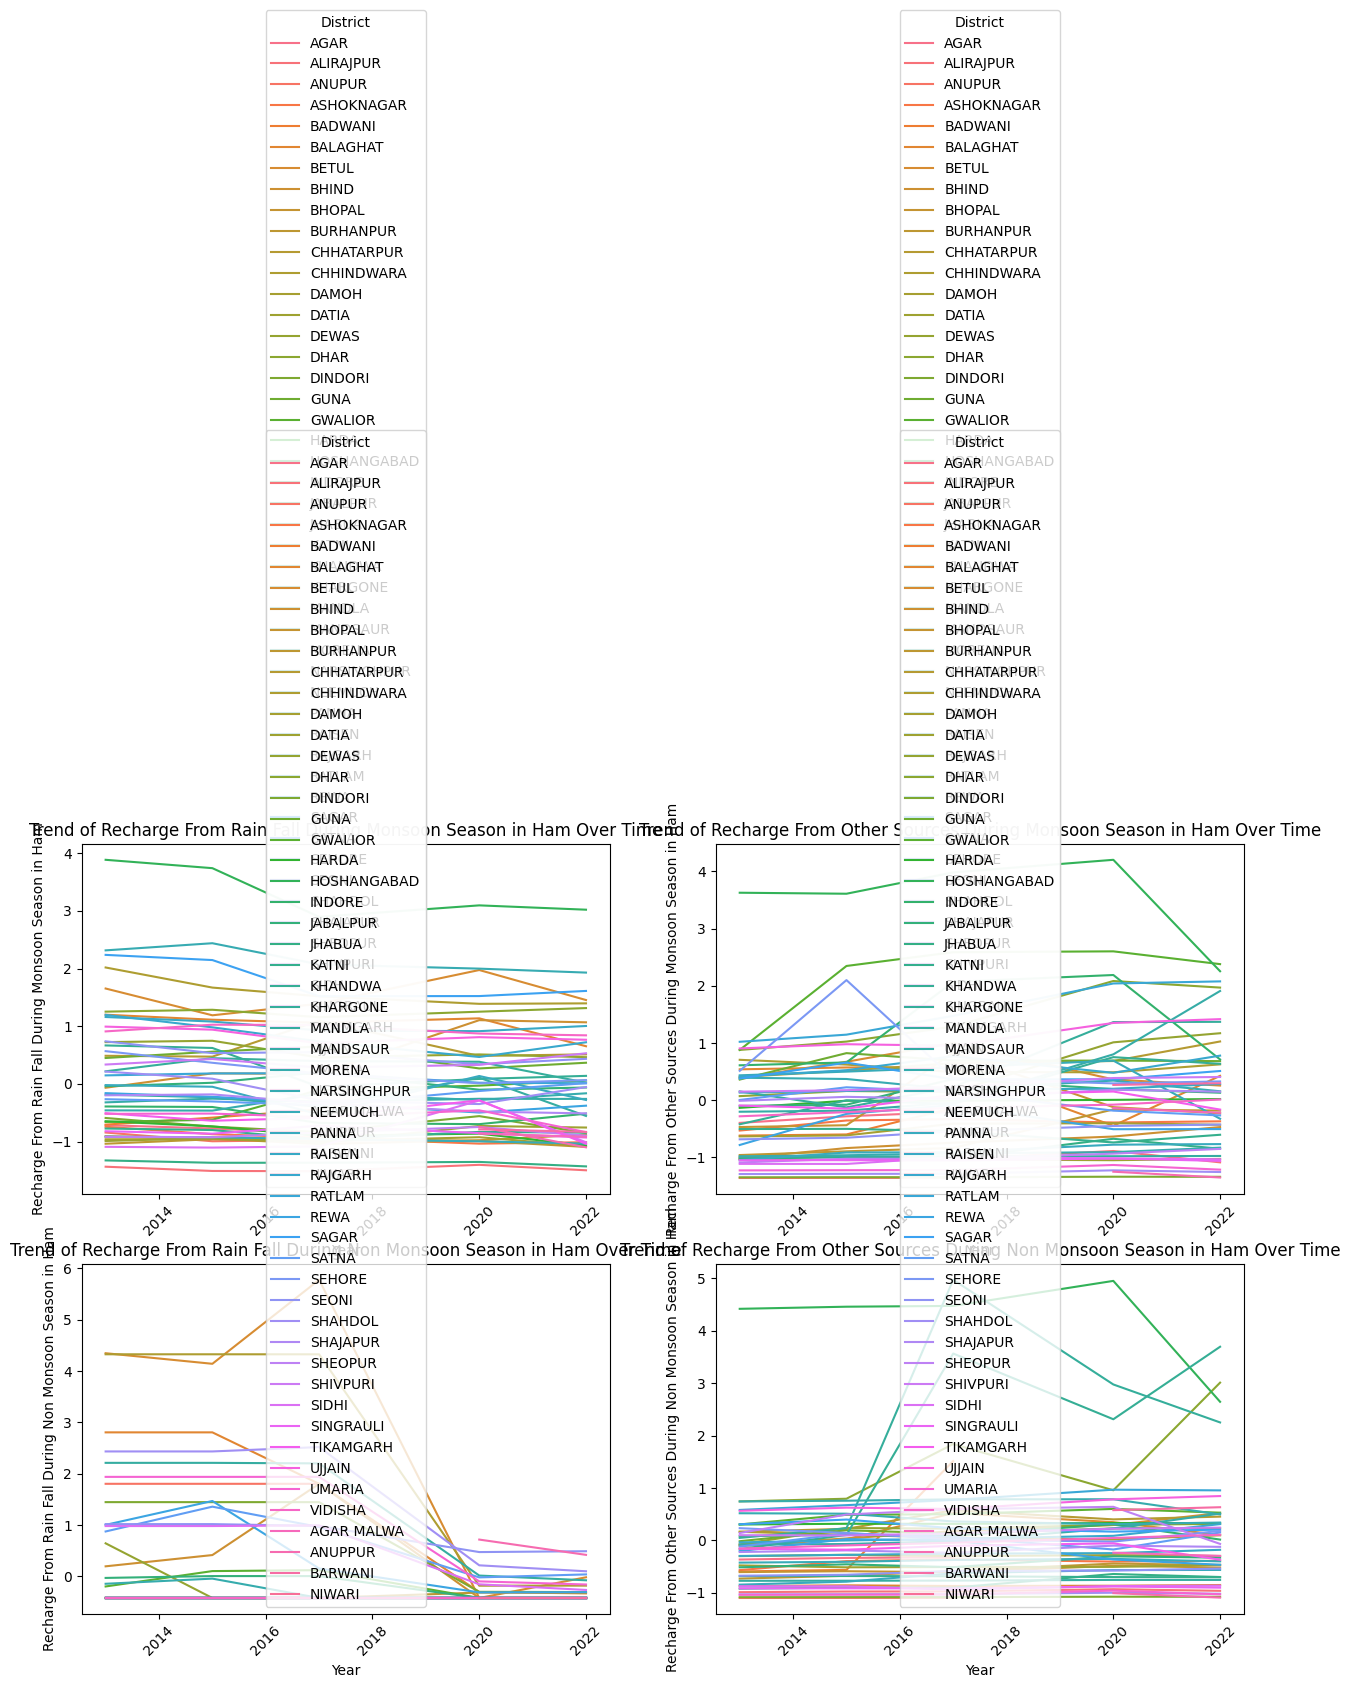

In [ ]:
# Time Series analysis
year_column = data.columns[0]  # The year column
if data[year_column].nunique() > 1:
    plt.figure(figsize=(15, 10))
    time_vars = key_variables[:4]  # Limit to fewer variables for clarity

    for i, variable in enumerate(time_vars):
        plt.subplot(2, 2, i + 1)
        sns.lineplot(x=year_column, y=variable, hue=district_column, data=data)
        plt.title(f'Trend of {variable} Over Time')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('time_series_analysis.png')
    plt.show()
else:
    print(f"Dataset contains only one year ({data[year_column].iloc[0]}), skipping time series analysis.")


In [ ]:
# Summary of EDA
print("\nKey Insights from the Analysis:")
print("1. The data has been standardized to have mean 0 and standard deviation 1.")
print(f"2. The total number of districts in the dataset is {data[district_column].nunique()}.")
print(f"3. PCA analysis shows that the first two principal components explain {sum(pca.explained_variance_ratio_)*100:.2f}% of the variance.")

if 'Cluster' in data.columns:
    print(f"4. Cluster analysis identified {optimal_k} distinct patterns in groundwater metrics across districts.")

    # Check which districts fall into each cluster
    for cluster in range(optimal_k):
        districts_in_cluster = data[data['Cluster'] == cluster][district_column].unique()
        print(f"   Cluster {cluster} contains districts: {', '.join(districts_in_cluster)}")

print("\nRecommendations for Further Analysis:")
print("1. Investigate the districts within the same cluster to understand common characteristics.")
print("2. Examine outlier districts that show extreme values in key metrics.")
print("3. If possible, correlate this groundwater data with external factors like rainfall, population, or agricultural practices.")


Key Insights from the Analysis:
1. The data has been standardized to have mean 0 and standard deviation 1.
2. The total number of districts in the dataset is 55.
3. PCA analysis shows that the first two principal components explain 69.55% of the variance.
4. Cluster analysis identified 3 distinct patterns in groundwater metrics across districts.
   Cluster 0 contains districts: BALAGHAT, BETUL, CHHATARPUR, CHHINDWARA, DEWAS, DHAR, GUNA, HOSHANGABAD, INDORE, KHANDWA, KHARGONE, NARSINGHPUR, RAISEN, RAJGARH, RATLAM, SAGAR, SATNA, SEHORE, SHIVPURI, UJJAIN, VIDISHA, BADWANI, GWALIOR
   Cluster 1 contains districts: BALAGHAT, BARWANI, BETUL, BHIND, CHHATARPUR, CHHINDWARA, DEWAS, DHAR, GUNA, GWALIOR, HOSHANGABAD, INDORE, JABALPUR, KHANDWA, KHARGONE, MANDSAUR, MORENA, NARSINGHPUR, PANNA, RAISEN, RAJGARH, RATLAM, SAGAR, SATNA, SEHORE, SEONI, SHAJAPUR, SHIVPURI, TIKAMGARH, UJJAIN, VIDISHA
   Cluster 2 contains districts: AGAR, ALIRAJPUR, ANUPUR, ASHOKNAGAR, BADWANI, BHIND, BHOPAL, BURHANPUR, DA

In [ ]:
# performing the Mann-Kendall test on standardized data
import pymannkendall as mk
from pymannkendall import original_test
# function to perform test on numercial data only excluding District and year column
def perform_mann_kendall_tests(data):
    results = {}
    # performing test on  from column 2 to last

    results = {}
    for column in data.iloc[:, 2:].select_dtypes(include=[np.number]).columns:
        series = data[column]
        result = original_test(series)
        results[column] = {
            'Trend': result.trend,
            'h': result.h,
            'p-Value': result.p,
            'Z-Statistic': result.z,
            'Tau':result.Tau,
            'S': result.s,
            'Variance S': result.var_s,
            'Slope': result.slope,
            'Intercept': result.intercept
        }
    return results

mk_results = perform_mann_kendall_tests(data)
print("Mann-Kendall Test Results:\n")
for key, value in mk_results.items():
    print(f"{key}: {value}\n")


Mann-Kendall Test Results:

Recharge From Rain Fall During Monsoon Season in Ham: {'Trend': 'no trend', 'h': np.False_, 'p-Value': np.float64(0.7144546437378037), 'Z-Statistic': np.float64(-0.3658799693223213), 'Tau': np.float64(-0.015379901960784313), 'S': np.float64(-502.0), 'Variance S': 1874986.6666666667, 'Slope': np.float64(-0.0002548740136897745), 'Intercept': np.float64(-0.1790216940881146)}

Recharge From Other Sources During Monsoon Season in Ham: {'Trend': 'no trend', 'h': np.False_, 'p-Value': np.float64(0.19187755224504244), 'Z-Statistic': np.float64(1.3050449205169423), 'Tau': np.float64(0.05477941176470588), 'S': np.float64(1788.0), 'Variance S': 1874986.6666666667, 'Slope': np.float64(0.0008437137447167161), 'Intercept': np.float64(-0.19669900912823385)}

Recharge From Rain Fall During Non Monsoon Season in Ham: {'Trend': 'decreasing', 'h': np.True_, 'p-Value': np.float64(0.03213251192154365), 'Z-Statistic': np.float64(-2.1427582925170494), 'Tau': np.float64(-0.07159926

In [ ]:
data.head()

,Year,District,Recharge From Rain Fall During Monsoon Season in Ham,Recharge From Other Sources During Monsoon Season in Ham,Recharge From Rain Fall During Non Monsoon Season in Ham,Recharge From Other Sources During Non Monsoon Season in Ham,Total Annual Recharge in Ham,Natural Discharge During Non Monsoon Season In Ham,Net Ground Water Availability in Ham,Existing Gross Ground Water Draft for Irrigation in Ham,Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,Existing Gross Ground Water Draft for All Uses in Ham,Allocation For Domestic & Industrial Water Supply in Ham,Net Ground Water Availability for Future Irrigation Development in Ham,Stage of Ground Water Development in %,Cluster
0,2013,AGAR,-0.717029,-0.397071,-0.423722,-0.364033,-0.699812,-0.903384,-0.678363,0.117446,-0.295343,0.573086,-0.704773,-0.552143,-0.576015,2
1,2013,ALIRAJPUR,-1.436776,-1.003608,-0.423722,-0.986386,-1.467540,-1.489843,-1.450599,-1.235660,0.325360,-0.657154,-0.523343,-0.368188,-0.578643,2
2,2013,ANUPUR,-0.843990,-1.360050,1.800791,-1.097537,-0.925093,-1.075472,-0.904967,-1.386438,-0.336966,-0.837411,-0.663831,0.659175,-0.580048,2
3,2013,ASHOKNAGAR,-0.744224,-0.531182,-0.423722,-0.565699,-0.794219,-0.975467,-0.773327,-0.620902,-0.077629,-0.105358,-0.669066,0.049644,-0.577808,2
4,2013,BADWANI,-0.706840,-0.619090,-0.423722,-0.590516,-0.780463,-0.964995,-0.759487,-0.139940,1.003741,0.408772,-0.573240,-0.521112,-0.576256,2


In [ ]:
# # Check unique district names and their counts
# district_counts = data["District"].value_counts()

# # Display unique districts with counts
# print("Unique Districts with Counts:\n")
# for district, count in district_counts.items():
#     print(f"{district}: {count}")


In [ ]:
# Count occurrences of each district
district_counts = data["District"].value_counts()

valid_districts = district_counts[district_counts == 5].index
# Filtering the DataFrame to keep only valid districts
filtered_data = data[data["District"].isin(valid_districts)].reset_index(drop=True)

print("Filtered DataFrame with districts having exactly 5 occurrences:")
filtered_data


Filtered DataFrame with districts having exactly 5 occurrences:


,Year,District,Recharge From Rain Fall During Monsoon Season in Ham,Recharge From Other Sources During Monsoon Season in Ham,Recharge From Rain Fall During Non Monsoon Season in Ham,Recharge From Other Sources During Non Monsoon Season in Ham,Total Annual Recharge in Ham,Natural Discharge During Non Monsoon Season In Ham,Net Ground Water Availability in Ham,Existing Gross Ground Water Draft for Irrigation in Ham,Existing Gross Ground Water Draft for Domestic & Industrial Water Supply in Ham,Existing Gross Ground Water Draft for All Uses in Ham,Allocation For Domestic & Industrial Water Supply in Ham,Net Ground Water Availability for Future Irrigation Development in Ham,Stage of Ground Water Development in %,Cluster
0,2013,ALIRAJPUR,-1.436776,-1.003608,-0.423722,-0.986386,-1.467540,-1.489843,-1.450599,-1.235660,0.325360,-0.657154,-0.523343,-0.368188,-0.578643,2
1,2013,ASHOKNAGAR,-0.744224,-0.531182,-0.423722,-0.565699,-0.794219,-0.975467,-0.773327,-0.620902,-0.077629,-0.105358,-0.669066,0.049644,-0.577808,2
2,2013,BALAGHAT,1.199106,0.539146,2.803108,-0.869117,0.834981,0.269174,0.865432,-0.981734,0.961736,-0.381853,-0.598858,2.569316,-0.579602,0
3,2013,BETUL,1.653396,0.385923,4.345074,-0.107445,1.524199,0.774281,1.560176,1.185078,1.156973,1.658390,-0.564271,1.231911,-0.577452,0
4,2013,BHIND,-0.067132,-1.018076,0.193159,-0.081256,-0.123621,-0.451437,-0.099607,-0.447131,0.751920,0.106297,-0.421247,0.542722,-0.578233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2022,SINGRAULI,-0.930629,-1.061408,-0.423722,-0.900555,-1.073064,-1.188509,-1.053807,-1.059883,0.655600,-0.826920,-0.142326,-0.663720,0.335301,2
236,2022,TIKAMGARH,-1.039069,-0.164380,-0.423722,-0.367232,-0.921867,-0.383095,-0.949536,-0.322009,-1.134189,-0.812001,0.551355,-0.629275,-0.296616,2
237,2022,UJJAIN,0.764878,1.416612,-0.423722,0.847474,0.892602,1.843424,0.817339,2.535314,-1.112484,-0.778599,3.683649,-0.613889,-0.111771,1
238,2022,UMARIA,-0.837041,-1.214278,-0.160721,-1.026630,-1.035689,-0.336897,-1.073254,-1.254584,-0.778262,-0.868161,-0.498515,-0.716663,0.711424,2


In [ ]:
# # Check unique district names and their counts
# district_counts = filtered_data["District"].value_counts()

# # Display unique districts with counts
# print("Unique Districts with Counts:\n")
# for district, count in district_counts.items():
#     print(f"{district}: {count}")


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pymannkendall import original_test

# def plot_gwl_trends(data, district_name):
#     district_data = data[data["District"] == district_name]
#     #Graph ka variables
#     years = district_data["Year"]
#     pre_monsoon_gwl = district_data["Recharge From Rain Fall During Non Monsoon Season in Ham"]
#     post_monsoon_gwl = district_data["Recharge From Rain Fall During Monsoon Season in Ham"]

#     #Performing Mann-Kendall test and calculate Sen's slope
#     pre_monsoon_trend = original_test(pre_monsoon_gwl)
#     post_monsoon_trend = original_test(post_monsoon_gwl)

#     #Sen's slope caculation
#     pre_monsoon_fit = pre_monsoon_trend.intercept + pre_monsoon_trend.slope * (years - years.min())
#     post_monsoon_fit = post_monsoon_trend.intercept + post_monsoon_trend.slope * (years - years.min())

#     plt.figure(figsize=(10, 6))
#     plt.plot(years, pre_monsoon_gwl, label="Pre-Monsoon GWL", marker='o', color='royalblue')
#     plt.plot(years, pre_monsoon_fit, label="Pre-Monsoon Sen's Slope", linestyle='--', color='purple')
#     plt.plot(years, post_monsoon_gwl, label="Post-Monsoon GWL", marker='o', color='green')
#     plt.plot(years, post_monsoon_fit, label="Post-Monsoon Sen's Slope", linestyle='--', color='red')

#     plt.title(f"Groundwater Trend Analysis for District: {district_name}")
#     plt.xlabel("Year")
#     plt.ylabel("Ground Water Level (Standardized)")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Loop through each district and plot trends
# unique_districts = filtered_data["District"].unique()
# for district in unique_districts:
#     plot_gwl_trends(filtered_data, district)

